In [45]:
# required imports
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from yellowbrick.regressor import PredictionError, prediction_error
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Loading dataset

In [20]:
df = pd.read_csv('data/boston_house_prices.csv', )

headers = df.iloc[0]
df.columns = [headers]
df.drop(index=0, axis=0, inplace=True)
df = df.rename(columns={
    'MEDV': 'price'
})
df = df.apply(pd.to_numeric)

/var/folders/44/1tm3ss055vg715drw98rb66r0000gn/T/ipykernel_14333/2298680359.py:4: DeprecationWarning: Series._data is deprecated and will be removed in a future version. Use public APIs instead.
  df.columns = [headers]


# Exploring data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     506 non-null    float64
 1   (ZN,)       506 non-null    float64
 2   (INDUS,)    506 non-null    float64
 3   (CHAS,)     506 non-null    int64  
 4   (NOX,)      506 non-null    float64
 5   (RM,)       506 non-null    float64
 6   (AGE,)      506 non-null    float64
 7   (DIS,)      506 non-null    float64
 8   (RAD,)      506 non-null    int64  
 9   (TAX,)      506 non-null    int64  
 10  (PTRATIO,)  506 non-null    float64
 11  (B,)        506 non-null    float64
 12  (LSTAT,)    506 non-null    float64
 13  (price,)    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Splitting into train and test

In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardization: Feature scaling

In [25]:
std_scaler = StandardScaler()

In [26]:
X_train_scaled = std_scaler.fit_transform(X_train)

# Model training

In [27]:
model = linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
model.intercept_

22.538700564971755

In [29]:
model.coef_

array([-1.0340733 ,  1.19552345,  0.51393452,  0.70396035, -2.96038127,
        2.13576004,  0.4663731 , -3.02967586,  3.26766428, -2.25465094,
       -2.47348429,  0.62961239, -4.28484919])

In [30]:
X_test_scaled = std_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Model evaluation

## R-squared

### yellowbrick

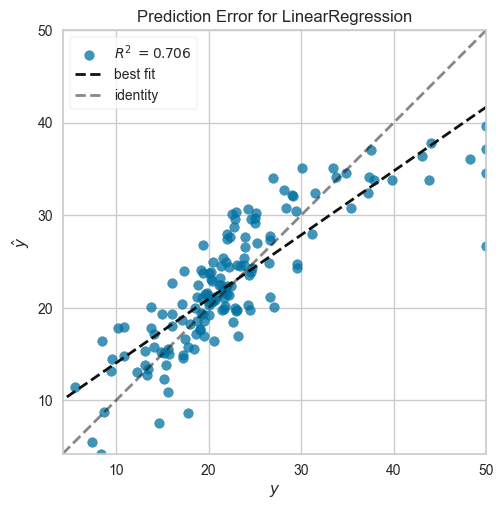

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
visualizer = PredictionError(model)

visualizer = prediction_error(model, X_train_scaled, y_train, X_test_scaled, y_test)
visualizer.show()    

### cross_validate

In [37]:
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2'], cv=5)

scores['test_r2'].mean()

0.7041202105842272

### model.score

In [44]:
model.score(X=X_test_scaled, y=y_test)

0.7056754715079216

### metrics.r2_score

In [46]:
metrics.r2_score(y_true=y_test, y_pred=y_pred)

0.7056754715079216

## Residual scatterplot

Text(0.5, 1.0, '\nResidual scatter plot vs model predictions')

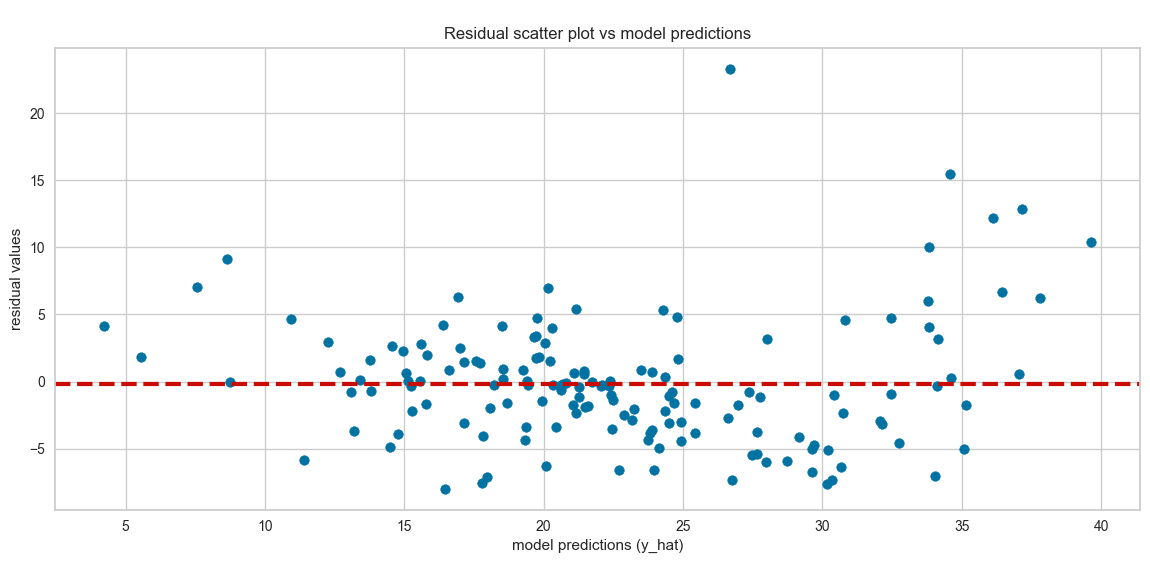

In [40]:
plt.figure(figsize=(14, 6))
plt.axhline(y=np.mean(y_test - y_pred), color='r', ls='--', linewidth=3)
plt.scatter(y_pred, y_test-y_pred)
plt.xlabel('model predictions (y_hat)')
plt.ylabel('residual values')
plt.title('\nResidual scatter plot vs model predictions')

it has an `homoscedasticity` distribution

## MAE, MSE, RMSE

In [55]:
print('MAE', metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('MSE', metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))

MAE 3.367380937260389
MSE 21.671065987276393
RMSE 4.655219220109445
